In [1]:
!pip install mrjob

In [2]:
!pip install pyarrow

In [33]:
!pip install matplotlib

In [34]:
from matplotlib import pyplot as plt

In [3]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.1/774.1 KB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 KB 8.4 MB/s eta 0:00:00


In [12]:
%%file task3.py

import nltk
from mrjob.job import MRJob
from mrjob.step import MRStep
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import string

class MRBigramsCount(MRJob):
    def steps(self):
        return [
            MRStep(mapper_init=self.mapper_init, mapper=self.mapper, combiner=self.combiner, reducer=self.reducer_cnt),
            MRStep(reducer=self.reducer_max)
        ]
        
    def mapper_init(self):
        nltk.download('punkt')
        nltk.download('stopwords')

    def mapper(self, _, line):
        line = line.split('\"')[-2].translate(str.maketrans('', '', string.punctuation))
        tokens = word_tokenize(line.lower())
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        for bigram in ngrams(tokens, 2):
            yield (bigram, 1)

    def combiner(self, bigram, counts):
        yield (bigram, sum(counts))

    def reducer_cnt(self, bigram, counts):
        yield None, (bigram, sum(counts))

    def reducer_max(self, _, counts):
        for count in sorted(counts, key=lambda x: x[1], reverse=True)[:20]:
            yield count
        
if __name__ == "__main__":
    MRBigramsCount.run()

Overwriting task3.py


In [5]:
file_names = ['SW_EpisodeIV.txt', 'SW_EpisodeV.txt', 'SW_EpisodeVI.txt']

In [13]:
for file_name in file_names:
    output_file = 'Result_'+ file_name
    !python3 task3.py $file_name > $output_file

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task3.root.20231206.064003.703039
Running step 1 of 2...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloadi

In [14]:
!python3 task3.py SW_EpisodeIV.txt SW_EpisodeV.txt SW_EpisodeVI.txt > Result_EpisodeAll.txt

No configs found; falling back on auto-configuration
No configs specified for inline runner
Creating temp directory /tmp/task3.root.20231206.064654.529921
Running step 1 of 2...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloadi

In [29]:
for file_name in file_names:
    input_file = 'hdfs://namenode:8020/' + file_name
    output_file = '/Hadoop_Result_'+ file_name
    !python3 task3.py -r hadoop $input_file --output $output_file

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task3.root.20231206.070651.336084
uploading working dir files to hdfs:///user/root/tmp/mrjob/task3.root.20231206.070651.336084/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task3.root.20231206.070651.336084/files/
Running step 1 of 2...
  Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
  packageJobJar: [/tmp/hadoop-unjar2626415737054371806/] [] /tmp/streamjob3458208684680368288.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.24.0.5:8032
  Connecting to ResourceManager at resourcemanager/172.24.0.5:8032
  Disabling

In [30]:
for file_name in file_names:
    input_file = 'hdfs://namenode:8020/Hadoop_Result_' + file_name + '/part-00000'
    output_file = 'Hadoop_Result_'+ file_name
    !hadoop fs -get $input_file $output_file

2023-12-06 10:09:36 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-12-06 10:09:38 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
2023-12-06 10:09:39 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [31]:
!python3 task3.py -r hadoop hdfs://namenode:8020/SW_EpisodeIV.txt hdfs://namenode:8020/SW_EpisodeV.txt hdfs://namenode:8020/SW_EpisodeVI.txt --output /Hadoop_Result_EpisodeAll.txt

No configs found; falling back on auto-configuration
No configs specified for hadoop runner
Looking for hadoop binary in /opt/hadoop/bin...
Found hadoop binary: /opt/hadoop/bin/hadoop
Using Hadoop version 3.3.6
Looking for Hadoop streaming jar in /opt/hadoop...
Found Hadoop streaming jar: /opt/hadoop/share/hadoop/tools/lib/hadoop-streaming-3.3.6.jar
Creating temp directory /tmp/task3.root.20231206.071028.080126
uploading working dir files to hdfs:///user/root/tmp/mrjob/task3.root.20231206.071028.080126/files/wd...
Copying other local files to hdfs:///user/root/tmp/mrjob/task3.root.20231206.071028.080126/files/
Running step 1 of 2...
  Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
  packageJobJar: [/tmp/hadoop-unjar6499007043388058837/] [] /tmp/streamjob411058053170331121.jar tmpDir=null
  Connecting to ResourceManager at resourcemanager/172.24.0.5:8032
  Connecting to ResourceManager at resourcemanager/172.24.0.5:8032
  Disabling 

In [32]:
!hadoop fs -get hdfs://namenode:8020/Hadoop_Result_EpisodeAll.txt/part-00000 Hadoop_Result_EpisodeAll.txt

2023-12-06 10:11:22 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


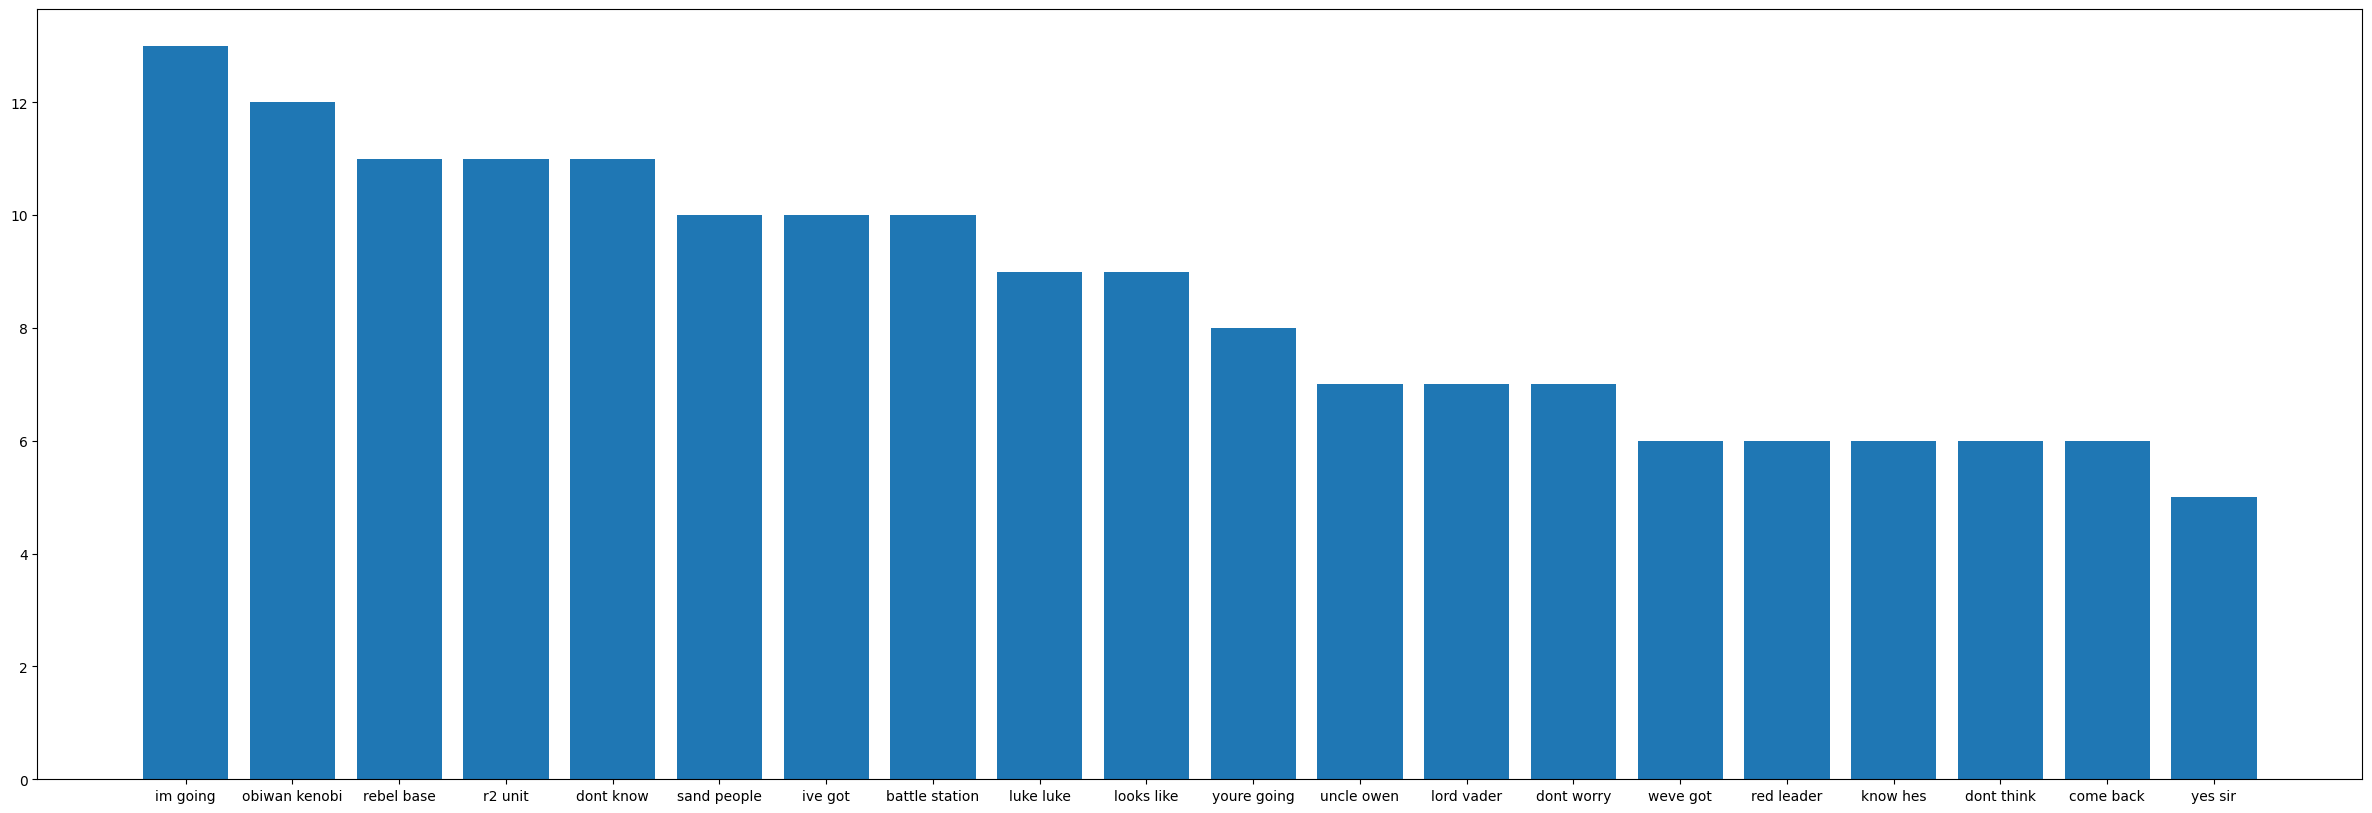

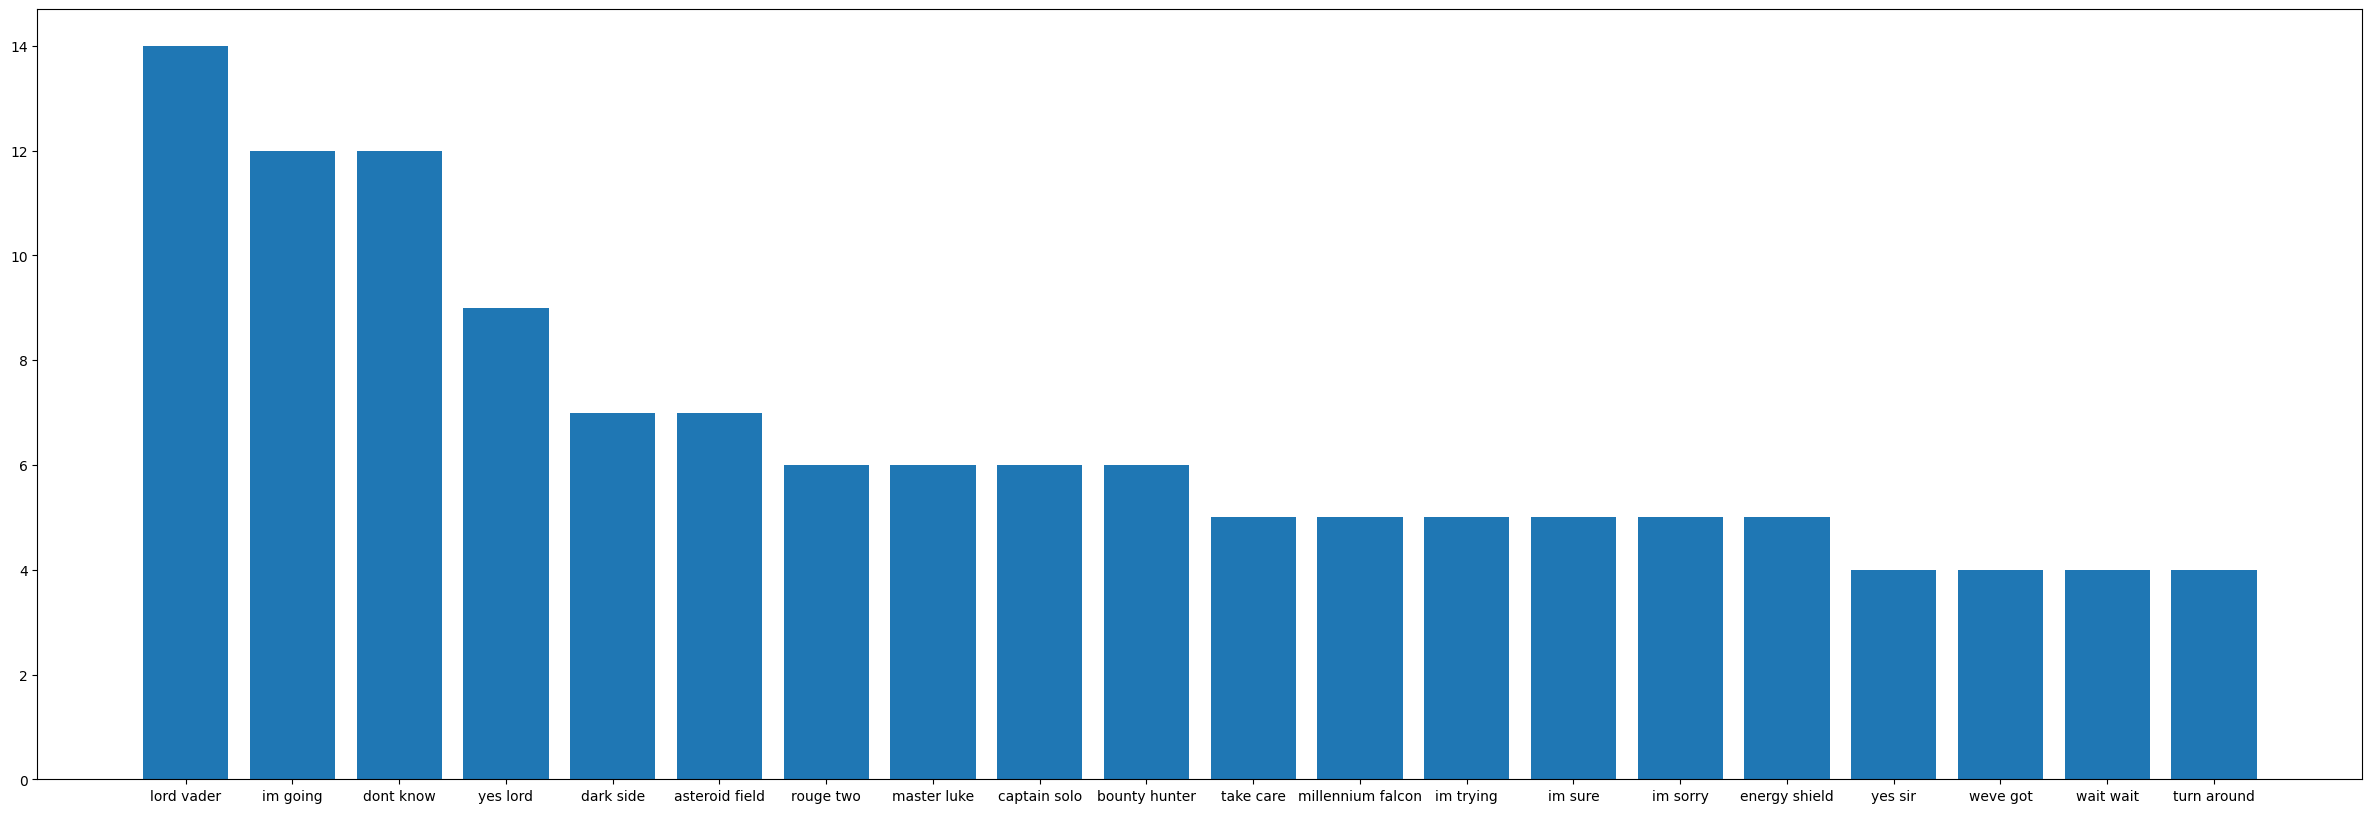

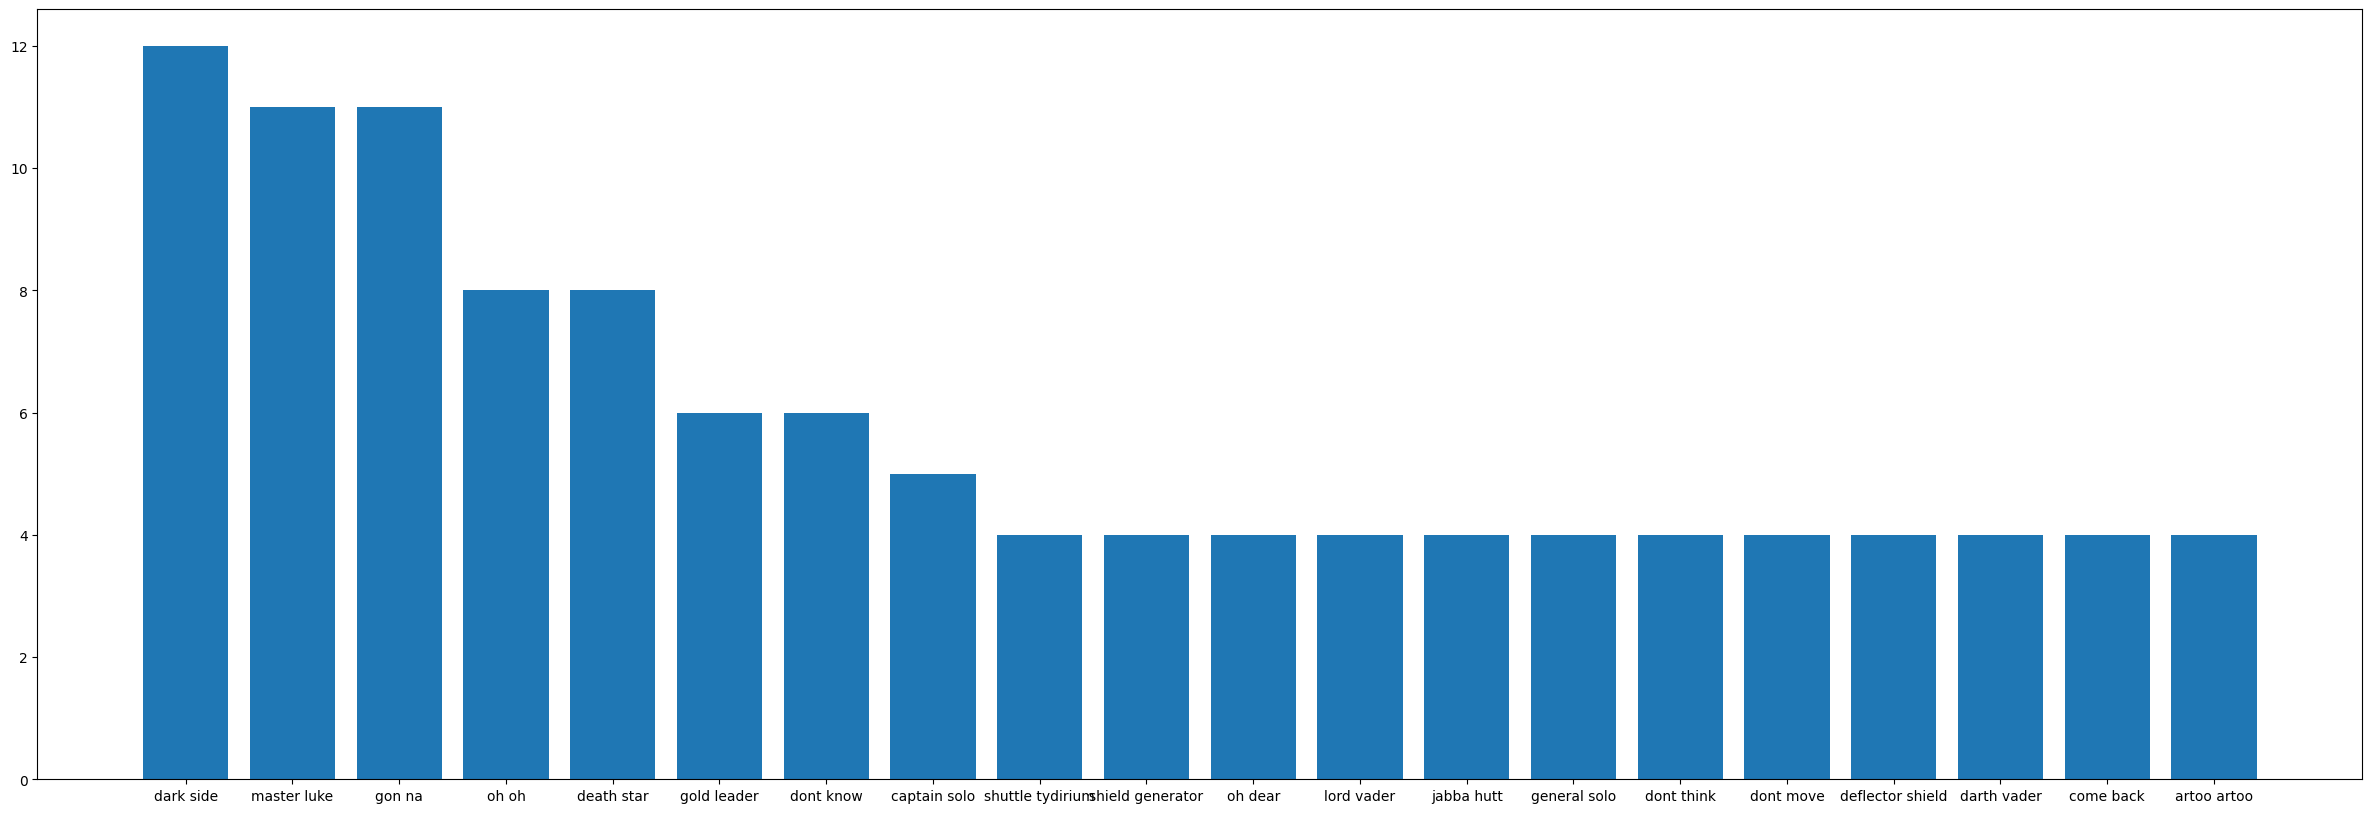

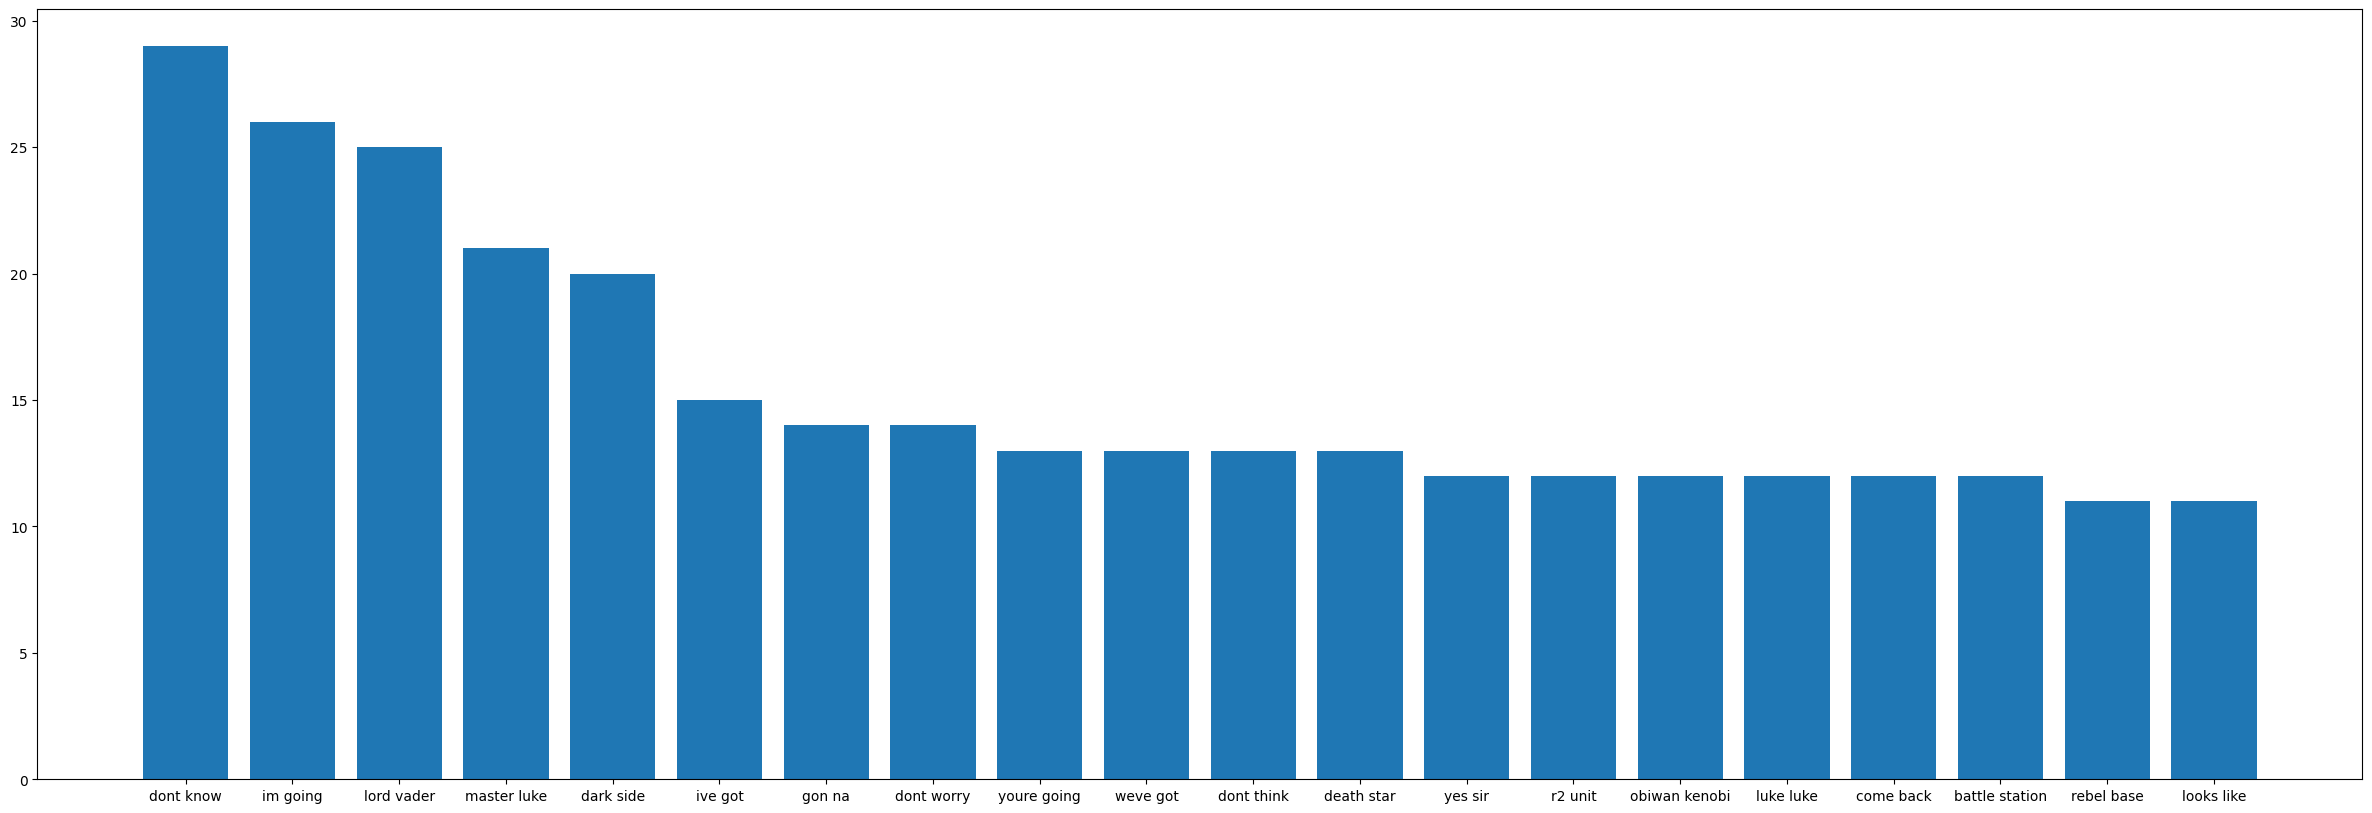

In [37]:
def build_plot(file_name):
    x, y = [], []
    with open(file_name) as file:
        for line in file:
            pair = line.replace('"', '').replace(',', '').replace(',', '').split('\t')
            x.append(pair[0][1:-1])
            y.append(int(pair[1][:-1]))
    plt.figure(figsize=(30,10))
    plt.bar(x, y)
    plt.show()

hadoop_results = ['Hadoop_Result_SW_EpisodeIV.txt', 'Hadoop_Result_SW_EpisodeV.txt', 'Hadoop_Result_SW_EpisodeVI.txt', 'Hadoop_Result_EpisodeAll.txt']
for result in hadoop_results:
    build_plot(result)